In [1]:
import pkg_resources
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset

from pyfgen import Fgen # Fgen library from git@gitlab.cce.kfa-juelich.de:Controls/UTILS/python-fgen-utils.git
print(pkg_resources.get_distribution('pyfgen').get_metadata('PKG-INFO'))

Metadata-Version: 1.0
Name: pyfgen
Version: 1.2.3
Summary: A library to work with fgen files
Home-page: https://gitlab.cce.kfa-juelich.de/Controls/UTILS/python-fgen-utils
Author: Ilja Bekman, Philipp Niedermayer, Christian Poulwey
Author-email: i.bekman@fz-juelich.de, p.niedermayer@fz-juelich.de, c.poulwey@fz-juelich.de
License: UNKNOWN
Description: UNKNOWN
Platform: UNKNOWN



In [2]:
freq = Fgen.from_file('freq.fgen1', '.')
print(freq.to_string())

100:2241416.68:0.0:0.0:0.0
100:2241416.68:0.0:7.44602298:-0.000456312828
100:2315420.6:1475.51521:7.31312592:-0.00147264057
116:2534630.74:2893.96118:-0.39306158:-9.15271325e-05
116:2864898.33:2799.07613:-0.424903218:-7.06251239e-05
116:3183763.43:2697.64758:-0.449456704:-5.04615933e-05
116:3490563.89:2591.3366:-0.466982313:-3.15807519e-05
116:3784825.93:2481.72185:-0.477929778:-1.43828098e-05
100:4066252.19:2370.26153:-6.37820548:0.00180992911
100:4241306.22:1148.91831:-5.83510699:0.000603436279
16000:4298450.42:0.0:0.0:0.0
100:4298450.42:0.0:-5.65407611:-0.000603436278
100:4241306.22:-1148.91831:-5.83522674:-0.00180992911
116:4066252.19:-2370.26153:-0.482934996:1.43828098e-05
116:3784825.93:-2481.72185:-0.477972415:3.15807518e-05
116:3490563.89:-2591.3366:-0.467017338:5.04615932e-05
116:3183763.43:-2697.64758:-0.449480761:7.06251239e-05
116:2864898.33:-2799.07613:-0.424913022:9.15271327e-05
100:2534630.74:-2893.96118:6.87133376:0.00147264057
100:2315420.6:-1475.51521:7.30912912:0.000

In [3]:
t = 8000
a = 0.4e-3
d = 1000
sweep = Fgen.sweep_simple(freq.value(t), a*freq.value(t), d)
freq.insert(t, sweep, overwrite=True)
print(freq.to_string())
freq.to_file('freq_sweep.fgen1', '.')

100:2241416.68:0.0:0.0:0.0
100:2241416.68:0.0:7.44602298:-0.000456312828
100:2315420.6:1475.51521:7.31312592:-0.00147264057
116:2534630.74:2893.96118:-0.39306158:-9.15271325e-05
116:2864898.33:2799.07613:-0.424903218:-7.06251239e-05
116:3183763.43:2697.64758:-0.449456704:-5.04615933e-05
116:3490563.89:2591.3366:-0.466982313:-3.15807519e-05
116:3784825.93:2481.72185:-0.477929778:-1.43828098e-05
100:4066252.19:2370.26153:-6.37820548:0.00180992911
100:4241306.22:1148.91831:-5.83510699:0.000603436279
6920:4298450.42:0.0:0.0:0.0
500:4298450.42:1.719380168000236:0.0:0.0
1000:4299310.110084:-1.719380168000236:0.0:0.0
500:4297590.729916:1.719380168000236:0.0:0.0
7080:4298450.42:0.0:0.0:0.0
100:4298450.42:0.0:-5.65407611:-0.000603436278
100:4241306.22:-1148.91831:-5.83522674:-0.00180992911
116:4066252.19:-2370.26153:-0.482934996:1.43828098e-05
116:3784825.93:-2481.72185:-0.477972415:3.15807518e-05
116:3490563.89:-2591.3366:-0.467017338:5.04615932e-05
116:3183763.43:-2697.64758:-0.449480761:7.06

c:\program files\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


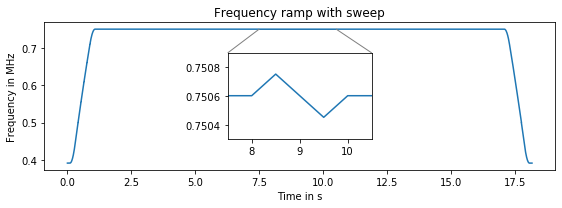

In [9]:
fig, ax = plt.subplots(figsize=(8,3))

T, V = freq.waveforms()
ax.plot(T*1e-3, V*1e-6/5.726665) # binary to Hz
#ax.set_ylim(0, 0.8)

#plt.ylim(0.75, 0.752)
axins = inset_axes(ax, width=2, height=1.2, loc='center')
axins.plot(T*1e-3, V*1e-6/5.726665)
axins.set_xlim(7.5, 10.5)
axins.set_ylim(0.7503, 0.7509)
mark_inset(ax, axins, loc1=2, loc2=1, fc="0.5", ec="0.5")

ax.set_title('Frequency ramp with sweep')
ax.set_xlabel('Time in s')
ax.set_ylabel('Frequency in MHz')
plt.tight_layout()
plt.savefig('fgen.pdf', dpi=300)